In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import dist

In [2]:
#import yelp dataset & select "InterestingProblemFreeForm" column
df = pd.read_csv('freeformResponses.csv')
df = df['InterestingProblemFreeForm']
df.head()

C:\Users\ffste\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,17,21,38,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: InterestingProblemFreeForm, dtype: object

In [3]:
#filter out null data 
df = df[df.notna()]
df.head()

5        self-learning personalized recommender system
6                                                   no
7    I'll try to make a machine that can help in fi...
8                                     Cancer detection
9                                           Healthcare
Name: InterestingProblemFreeForm, dtype: object

In [4]:
#create L2 normalized term frequency - inverse document frequency matrix (sparse matrix)
count_vec = TfidfVectorizer(stop_words='english',norm='l2').fit_transform(df)
count_vec

<4453x4877 sparse matrix of type '<class 'numpy.float64'>'
	with 22024 stored elements in Compressed Sparse Row format>

In [5]:
#grid search optimization LSA and kMeans hyperparameters using total within sum of squares as loss function
comp = [2,4,6,8,10]
k = [1,2,3,4,5,6,7,8,9,10]
sum_of_squares = []

for i in comp:
    for j in k:
        svd = TruncatedSVD(n_components=i, random_state=0).fit_transform(count_vec)
        kmeans = KMeans(n_clusters=j, random_state=0)
        kmeans.fit(svd)
        sum_of_squares.append(kmeans.inertia_)

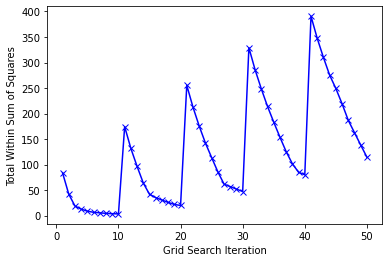

In [6]:
#plot results
plt.plot(range(1,51), sum_of_squares,'bx-')
plt.xlabel('Grid Search Iteration')
plt.ylabel('Total Within Sum of Squares')
plt.show()

1) Lowering diminsionallity to 2 components yields best results. <br>
2) These results are further optimized when k = 3.

In [7]:
#create optimized pipeline
svd = TruncatedSVD(n_components=2, random_state=0).fit_transform(count_vec)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(svd);

In [8]:
#order clusters by membership
clust_size = pd.DataFrame({"labels":kmeans.labels_}).groupby("labels")["labels"].count().sort_values(ascending = False).index
clust_size

Int64Index([0, 2, 1], dtype='int64', name='labels')

In [9]:
#find indeces of k medoids 
indices = []
for i in clust_size:
    distances = []
    for j in svd:
        distances.append(dist(kmeans.cluster_centers_[i],j))
    indices.append(np.argmin(distances))        

In [10]:
#return medoid review text in order of topic prevalence 
for i in df.iloc[indices]:
    print(i + 3*'\n')

disease diagnosis



semantic language recognition



computer vision techniques



